## Saurabh Dadhich
### Indian Institute Of Technology

## Decision Tree algorithm Implementation: 

### Importing required packages: 

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

### Preprocessing Data: 

In [2]:
data = pd.read_csv(r"Iris.csv")

In [3]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
#species_encoder = LabelEncoder()
#data["Species"] = species_encoder.fit_transform(data['Species'])           # returns numpy array


data_X = data.drop(['Species','Id'],axis = 1)
data_Y = data['Species']  

print("Shape of data_X:  ",data_X.shape)
print("Shape of data_Y:  ",data_Y.shape)

Shape of data_X:   (150, 4)
Shape of data_Y:   (150,)


In [6]:
print(data_X.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### Train Test split: 

In [7]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size = 0.25, random_state = 100) 
print("Train_X shape: ",train_X.shape)
print("Train_Y shape: ",train_Y.shape)
print("Test_X shape: ",test_X.shape)
print("Test_Y shape: ",test_y.shape)

### Model Training: 

In [8]:
Tree = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=4, min_samples_leaf=2)

In [9]:
Tree.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=100)

### Visualising Decision Tree graph:

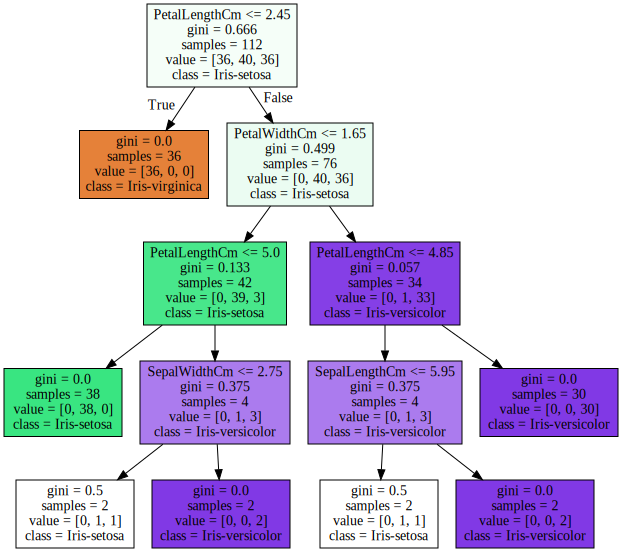

In [24]:
dot_data = tree.export_graphviz(Tree, out_file=None, 
                                feature_names=train_X.columns,  
                                class_names=train_Y.unique(),
                                filled=True)

# Draw graph 
graph = graphviz.Source(dot_data, format="png") 
graph

### Prediction: 

In [19]:
predicted_Y = Tree.predict(test_X) 
print(predicted_Y)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


### Accuracy:

In [20]:
print ("Accuracy : ", 
accuracy_score(test_Y,predicted_Y)*100)

Accuracy :  94.73684210526315


In [21]:
print("Report : ", 
classification_report(test_Y, predicted_Y)) 

Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38

